In [5]:
# an object oriented code for the game of LUDO

import random as rd

# first define the object called a die

class Die(object):
    def __init__(self, sides=6, name='normal die'): # the object = instance of the class is created and self refers to it
        self.sides = sides
        self.name = name
        
    def __repr__(self):
        return 'This is a normal die with ' + str(self.sides) + ' sides'
        
    def roll(self):
        outcome = rd.choice(range(1,self.sides + 1))
        return outcome

In [6]:
z = Die(4, 'random')
print z
print z.roll()
z.name = 'new name'
print z.name
# print type(z)

This is a normal die with 4 sides
1
new name


In [7]:
# now a special kind of die

class ShakuniDie(object):
    
    def __init__(self, sides=6): # the object = instance of the class is created and self refers to it
        self.sides = sides
        self.name = 'shakuni die'
    
    def roll(self, whateveryouwant=0):
        
        if whateveryouwant < 1:
            print 'are you crazy? roll again'
            return
        elif whateveryouwant > self.sides:
            print 'hmm, that\'s not possible, roll again'
            return
        outcome = whateveryouwant
        return outcome
        
    def __repr__(self):
        return 'This is a Shakuni die with ' + str(self.sides) + ' sides'

In [9]:
y = ShakuniDie(4)
print y
print y.roll(4)

This is a Shakuni die with 4 sides
4


In [10]:
# a player is also another object, who has a name, a die type, a current location
# the current location may increase by an amount

class Player(object):
    def __init__(self, name, dieType, dieSide):
        self.name = name
        self.dieType = dieType
        self.die = self.dieType(dieSide)
        self.currLoc = 0
    
    def __repr__(self):
        return 'Name: ' + self.name + ', die type: ' + str(self.die) + ', die side: ' + str(self.die.sides) + \
            '\nThe player\'s current location is ' + str(self.currLoc)
        
    def currLocation(self):
        return self.currLoc
        
    def incrLocation(self, amount):
        self.currLoc += amount

In [11]:
p1 = Player('sourav', ShakuniDie, 4)
print p1
p1.incrLocation(4)
print p1

Name: sourav, die type: This is a Shakuni die with 4 sides, die side: 4
The player's current location is 0
Name: sourav, die type: This is a Shakuni die with 4 sides, die side: 4
The player's current location is 4


In [12]:
# when the class ShakuniDie is passed to the class Player, its methods also went with it -- just like a new data type

p1.die.roll(3)

3

In [13]:
p2 = Player('sachin', Die, 4)
p2

Name: sachin, die type: This is a normal die with 4 sides, die side: 4
The player's current location is 0

In [16]:
# now define the game

class Ludo(object):
    '''
    Creates an instance of the game of ludo
    
    
    Examples
    ---------
    >>> game = oop.Ludo(numOfPlayers=2, lengthOfBoard=20, dieSide=6)
    
    Returns
    --------
    An instance of the game which can be simulated using
    
    >>> game.gameSimulate()
    
    '''
    def __init__(self, numOfPlayers=2, lengthOfBoard=20, dieSide=6):
        self.numplayers = numOfPlayers
        self.lenboard = lengthOfBoard
        self.dieSide = dieSide
        
    def gameSimulate(self):
        print '\nThis is a simplified ludo game where each player has one piece that must reach a destination.\n'
        playerSet = []
        for player in xrange(self.numplayers):
            name = raw_input('Enter the name of player ' + str(player+1) + ': ')
            playerSet.append(Player(name, Die, self.dieSide))
        
        print '\nThe players are:' 
        for player in xrange(self.numplayers):
            print playerSet[player]
        
        print '\nThe game begins\n'
        winnerFound = False
        toGoVector = [self.lenboard] * self.numplayers
        currPositions = [0] * self.numplayers
        openGame = [False] * self.numplayers
        
        while not winnerFound:
            
            for player in xrange(self.numplayers):
                print '\ncurrent positions:'
                print currPositions
                
                currPlayer = playerSet[player]
                print '\n=================\n' + currPlayer.name + '\'s turn:\n================='
                raw_input()
                currDraw = currPlayer.die.roll()
                print ' draw yields', currDraw
                
                    
                if openGame[player]:
                    if currDraw <= toGoVector[player]:
                        toGoVector[player] -= currDraw
                        currPlayer.incrLocation(currDraw)
                        currPositions[player] += currDraw
                        # now to check if others' pieces are cut
                        for otherplayer in set(range(self.numplayers)) - set([player]):
                            if playerSet[otherplayer].currLocation() == currPlayer.currLocation():
                                playerSet[otherplayer].incrLocation(-currPlayer.currLocation())
                                toGoVector[otherplayer] = self.lenboard
                                currPositions[otherplayer] = 0
                                openGame[otherplayer] = False
                                print ' feeling sorry for ' + playerSet[otherplayer].name
                                print ' reset ' + playerSet[otherplayer].name + '\'s piece'
                    else:
                        print '\n can\'t move piece'
                else:
                    # open the game when the largest draw of the die occurs
                    if currDraw == self.dieSide:
                        openGame[player] = True
                        print '\n game opens for ' + currPlayer.name
                    else:
                        print '\n haven\'t tossed ' + str(self.dieSide) + ', try next time'
                        
                        
                if toGoVector[player] == 0:
                    print '\nEureka!', currPlayer.name, 'wins!'
                    winnerFound = True
                    break
                
                
                
def doSimulation(numOfPlayers, lengthOfBoard, dieSide):
    L1 = Ludo(numOfPlayers, lengthOfBoard, dieSide)
    L1.gameSimulate()

In [15]:
Ludo?

In [17]:
doSimulation(numOfPlayers=2, lengthOfBoard=20, dieSide=6)


This is a simplified ludo game where each player has one piece that must reach a destination.

Enter the name of player 1: keshav
Enter the name of player 2: priyanshu

The players are:
Name: keshav, die type: This is a normal die with 6 sides, die side: 6
The player's current location is 0
Name: priyanshu, die type: This is a normal die with 6 sides, die side: 6
The player's current location is 0

The game begins


current positions:
[0, 0]

keshav's turn:

 draw yields 2

 haven't tossed 6, try next time

current positions:
[0, 0]

priyanshu's turn:

 draw yields 5

 haven't tossed 6, try next time

current positions:
[0, 0]

keshav's turn:

 draw yields 5

 haven't tossed 6, try next time

current positions:
[0, 0]

priyanshu's turn:

 draw yields 2

 haven't tossed 6, try next time

current positions:
[0, 0]

keshav's turn:

 draw yields 6

 game opens for keshav

current positions:
[0, 0]

priyanshu's turn:

 draw yields 2

 haven't tossed 6, try next time

current positions:
[0,

In [18]:
# discrete random variable simulation

import numpy as np

class discreteRV(object):
    
    def __init__(self, distribution):
        self.dist = np.array(distribution)
    
    def draw(self, samplesize=1):
        
        cdf = np.cumsum(self.dist)
#         print 'cdf =', cdf
        samples = np.random.uniform(0, 1, samplesize)
#         rvSamples = np.array([])
        rvSamples = []
        for sample in samples:
#             print 'sample =', sample
#             print 'cdf =', cdf
            tempIndex = np.min(np.where(sample < cdf)) # inverse CDF mapping method for sampling RVs
#             print sample < cdf
#             print 'tempIndex =', tempIndex
#             rvSamples = np.append(rvSamples, tempIndex)
            rvSamples.append(tempIndex)
#             print 'rvSamples =', rvSamples
        return rvSamples
  

Enter the discrete distribution (in list format): [0.1, 0.2, 0.3, 0.2, 0.2]
hist = [ 99676 199976 300143 199560 200645] bin_edges = [ 0.   0.8  1.6  2.4  3.2  4. ] sum(hist) = 1000000


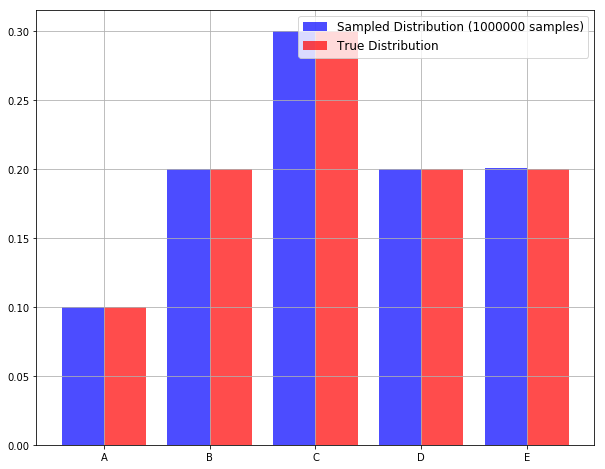

In [22]:
valid = False
while not valid:
    try:
        q = input('Enter the discrete distribution (in list format): ')
        q = np.array(q)
        if (np.sum(q >= 0) == np.size(q)) and np.sum(q) == 1:
            valid = True
        else: 
            print 'Not a valid distribution, do it again'
    except SyntaxError:
        print 'Formatting Error'
        continue


sampleSize = 1000000
d = discreteRV(q)
dsamples = d.draw(sampleSize)
sizeOfStateSpace = np.size(q)

hist, bin_edges = np.histogram(dsamples, bins=sizeOfStateSpace)
print 'hist =', hist, 'bin_edges =', bin_edges, 'sum(hist) =', sum(hist)

x = range(sizeOfStateSpace) - (bin_edges[1] - bin_edges[0]) / 2

import string
import matplotlib.pyplot as plt

xLabels = list(string.ascii_uppercase)[:len(q)]
pdf = hist / float(sampleSize)
plt.figure(figsize=(10,8))
plt.bar(x, pdf, label='Sampled Distribution (' + str(sampleSize) + ' samples)', alpha=0.7, width=0.4, color='b')
plt.bar(x+0.4, q, label='True Distribution', alpha=0.7, width=0.4, color='r')
plt.grid()
#    pl.axis([-0.1, np.size(q) - 0.9, -0.1, 1.0])
plt.xticks(x+0.2, xLabels)
plt.legend(loc='best', fontsize=12)
plt.show()